In [25]:
# Step 1: Importing the required libraries:
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
# step 2: Create the data:
data = pd.DataFrame({'Age':[20,21,22,23,24,25,26,27,28,29,30,50]})

In [27]:
data

,Age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


<Axes: xlabel='Age', ylabel='Count'>

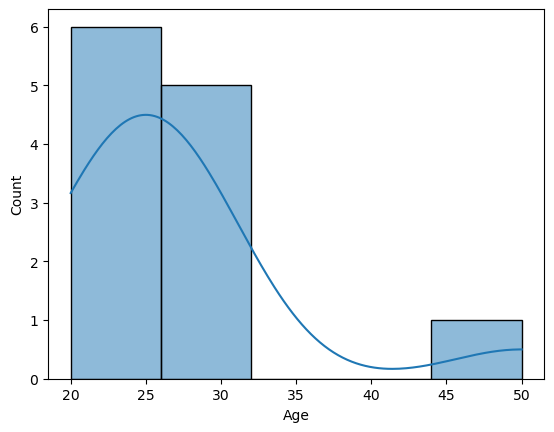

In [28]:
sns.histplot(data['Age'], bins=5, kde=True)

<Axes: ylabel='Age'>

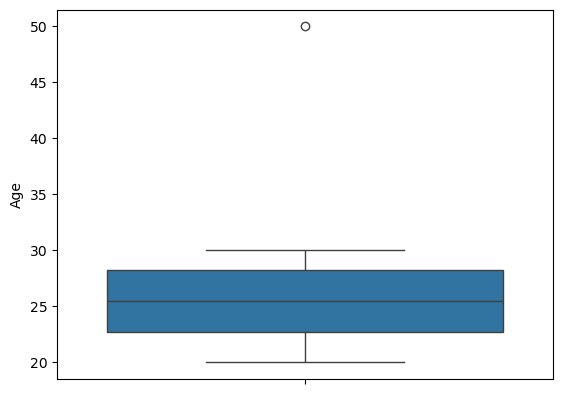

In [29]:
sns.boxplot(data['Age'])

In [30]:
# Step 3: Calcualating the mean and standard deviation:
data['mean'] = np.mean(data['Age'])
data['std'] = np.std(data['Age'])

# Step 4: Calculating the Z-score:
data['Z-score'] = (data['Age']-data['mean']) / data['std']
data

,Age,mean,std,Z-score
0,20,27.083333,7.543853,-0.938954
1,21,27.083333,7.543853,-0.806396
2,22,27.083333,7.543853,-0.673838
3,23,27.083333,7.543853,-0.541280
4,24,27.083333,7.543853,-0.408721
5,25,27.083333,7.543853,-0.276163
6,26,27.083333,7.543853,-0.143605
7,27,27.083333,7.543853,-0.011047
8,28,27.083333,7.543853,0.121512
9,29,27.083333,7.543853,0.254070


In [31]:
# Step 5: Print the data:
print(f'Here is the data with outliers:\n {data}')

Here is the data with outliers:
     Age       mean       std   Z-score
0    20  27.083333  7.543853 -0.938954
1    21  27.083333  7.543853 -0.806396
2    22  27.083333  7.543853 -0.673838
3    23  27.083333  7.543853 -0.541280
4    24  27.083333  7.543853 -0.408721
5    25  27.083333  7.543853 -0.276163
6    26  27.083333  7.543853 -0.143605
7    27  27.083333  7.543853 -0.011047
8    28  27.083333  7.543853  0.121512
9    29  27.083333  7.543853  0.254070
10   30  27.083333  7.543853  0.386628
11   50  27.083333  7.543853  3.037793


In [33]:
# Step 6: Print the outlier:
print(f"Here are the outlier based on the z-score threshold, 3:\n {data[data['Z-score'] > 3]}")

Here are the outlier based on the z-score threshold, 3:
     Age       mean       std   Z-score
11   50  27.083333  7.543853  3.037793


In [34]:
# Step 7: Removing the outliers:
data = data[data['Z-score']<=3]

# Step 8: Printing the data without outliers:
print(f"Here is the data without outliers:\n {data}")

Here is the data without outliers:
     Age       mean       std   Z-score
0    20  27.083333  7.543853 -0.938954
1    21  27.083333  7.543853 -0.806396
2    22  27.083333  7.543853 -0.673838
3    23  27.083333  7.543853 -0.541280
4    24  27.083333  7.543853 -0.408721
5    25  27.083333  7.543853 -0.276163
6    26  27.083333  7.543853 -0.143605
7    27  27.083333  7.543853 -0.011047
8    28  27.083333  7.543853  0.121512
9    29  27.083333  7.543853  0.254070
10   30  27.083333  7.543853  0.386628


# Z-score Method for outliers:

In [39]:
# Z-score Method for outliers:

# Import libraries:
import numpy as np
from scipy import stats

# Sample dataset:
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the z-score for each data point:
z_score = np.abs(stats.zscore(data))

# Set threshold for identifying outliers:
threshold = 2.5
outliers = np.where(z_score > threshold)[0]

# Print the data:
print("Data:", data)

print("Indicate of outlier:", outliers)
print("outliers:", [data[i] for i in range(len(data)) if i in outliers])

# Removing the outliers:
data = [data[i] for i in range(len(data)) if i not in outliers]

print("Data without outliers:", data)


Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
Indicate of outlier: [9]
outliers: [110.0]
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# Inter Quartile Range Methode for Outliers:

In [41]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


# K-Means Clustering Method to find outliers:

In [42]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[30, 30], [31, 31], [32, 32]]
